In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


%matplotlib inline

pd.options.display.float_format = "{:.12f}".format

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15, 15)

In [95]:
df = pd.read_csv('downloads/Bitcoin_kaggle.csv', sep = ';')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jul 14, 2023","30,346.4","29,912.7","30,442.0","29,757.4",46.42K,1.45%
1,"Jul 13, 2023","30,346.4","29,912.7","30,442.0","29,757.4",46.42K,1.45%
2,"Jul 12, 2023","30,346.4","29,912.7","30,442.0","29,757.4",46.42K,1.45%
3,"Jul 11, 2023","30,346.4","29,912.7","30,442.0","29,757.4",46.42K,1.45%
4,"Jul 10, 2023","30,346.4","29,912.7","30,442.0","29,757.4",46.42K,1.45%
...,...,...,...,...,...,...,...
542,"Jan 18, 2022","42,364.6","42,209.9","42,674.2","41,300.7",47.32K,0.37%
543,"Jan 17, 2022","42,209.3","43,080.5","43,179.6","41,559.4",41.44K,-2.02%
544,"Jan 16, 2022","43,079.1","43,079.2","43,462.0","42,643.3",28.66K,-0.04%
545,"Jan 15, 2022","43,097.0","43,073.6","43,777.9","42,586.1",31.44K,0.06%


In [96]:
df.Date = pd.DatetimeIndex(df.Date)

In [97]:
df = df.sort_values(by="Date")
df

,Date,Price,Open,High,Low,Vol.,Change %
546,2022-01-14,"43,073.3","42,562.2","43,435.1","41,848.7",50.50K,1.21%
545,2022-01-15,"43,097.0","43,073.6","43,777.9","42,586.1",31.44K,0.06%
544,2022-01-16,"43,079.1","43,079.2","43,462.0","42,643.3",28.66K,-0.04%
543,2022-01-17,"42,209.3","43,080.5","43,179.6","41,559.4",41.44K,-2.02%
542,2022-01-18,"42,364.6","42,209.9","42,674.2","41,300.7",47.32K,0.37%
...,...,...,...,...,...,...,...
4,2023-07-10,"30,346.4","29,912.7","30,442.0","29,757.4",46.42K,1.45%
3,2023-07-11,"30,346.4","29,912.7","30,442.0","29,757.4",46.42K,1.45%
2,2023-07-12,"30,346.4","29,912.7","30,442.0","29,757.4",46.42K,1.45%
1,2023-07-13,"30,346.4","29,912.7","30,442.0","29,757.4",46.42K,1.45%


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547 entries, 546 to 0
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      547 non-null    datetime64[ns]
 1   Price     547 non-null    float64       
 2   Open      547 non-null    object        
 3   High      547 non-null    object        
 4   Low       547 non-null    object        
 5   Vol.      547 non-null    object        
 6   Change %  547 non-null    object        
 7   length    547 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 38.5+ KB


In [98]:
df.Price = df.Price.apply(lambda x: float(x.replace(',','')))
df

,Date,Price,Open,High,Low,Vol.,Change %
546,2022-01-14,43073.300000000003,"42,562.2","43,435.1","41,848.7",50.50K,1.21%
545,2022-01-15,43097.000000000000,"43,073.6","43,777.9","42,586.1",31.44K,0.06%
544,2022-01-16,43079.099999999999,"43,079.2","43,462.0","42,643.3",28.66K,-0.04%
543,2022-01-17,42209.300000000003,"43,080.5","43,179.6","41,559.4",41.44K,-2.02%
542,2022-01-18,42364.599999999999,"42,209.9","42,674.2","41,300.7",47.32K,0.37%
...,...,...,...,...,...,...,...
4,2023-07-10,30346.400000000001,"29,912.7","30,442.0","29,757.4",46.42K,1.45%
3,2023-07-11,30346.400000000001,"29,912.7","30,442.0","29,757.4",46.42K,1.45%
2,2023-07-12,30346.400000000001,"29,912.7","30,442.0","29,757.4",46.42K,1.45%
1,2023-07-13,30346.400000000001,"29,912.7","30,442.0","29,757.4",46.42K,1.45%


In [100]:
df.index = pd.PeriodIndex(df.Date, freq="D")
df

,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,
2022-01-14,2022-01-14,43073.300000000003,"42,562.2","43,435.1","41,848.7",50.50K,1.21%
2022-01-15,2022-01-15,43097.000000000000,"43,073.6","43,777.9","42,586.1",31.44K,0.06%
2022-01-16,2022-01-16,43079.099999999999,"43,079.2","43,462.0","42,643.3",28.66K,-0.04%
2022-01-17,2022-01-17,42209.300000000003,"43,080.5","43,179.6","41,559.4",41.44K,-2.02%
2022-01-18,2022-01-18,42364.599999999999,"42,209.9","42,674.2","41,300.7",47.32K,0.37%
...,...,...,...,...,...,...,...
2023-07-10,2023-07-10,30346.400000000001,"29,912.7","30,442.0","29,757.4",46.42K,1.45%
2023-07-11,2023-07-11,30346.400000000001,"29,912.7","30,442.0","29,757.4",46.42K,1.45%
2023-07-12,2023-07-12,30346.400000000001,"29,912.7","30,442.0","29,757.4",46.42K,1.45%


In [136]:
ts = df.drop(
    ["Date", "Open", "High", "Low", "Vol.", "Change %"], axis=1
)
ts_pred = ts[-7:].copy()
ts_pred

,Price
Date,
2023-07-08,30346.400000000001
2023-07-09,30346.400000000001
2023-07-10,30346.400000000001
2023-07-11,30346.400000000001
2023-07-12,30346.400000000001
2023-07-13,30346.400000000001
2023-07-14,30346.400000000001


In [137]:
ts = ts[:-7]
ts

,Price
Date,
2022-01-14,43073.300000000003
2022-01-15,43097.000000000000
2022-01-16,43079.099999999999
2022-01-17,42209.300000000003
2022-01-18,42364.599999999999
...,...
2023-07-03,31151.299999999999
2023-07-04,30768.400000000001
2023-07-05,30512.799999999999


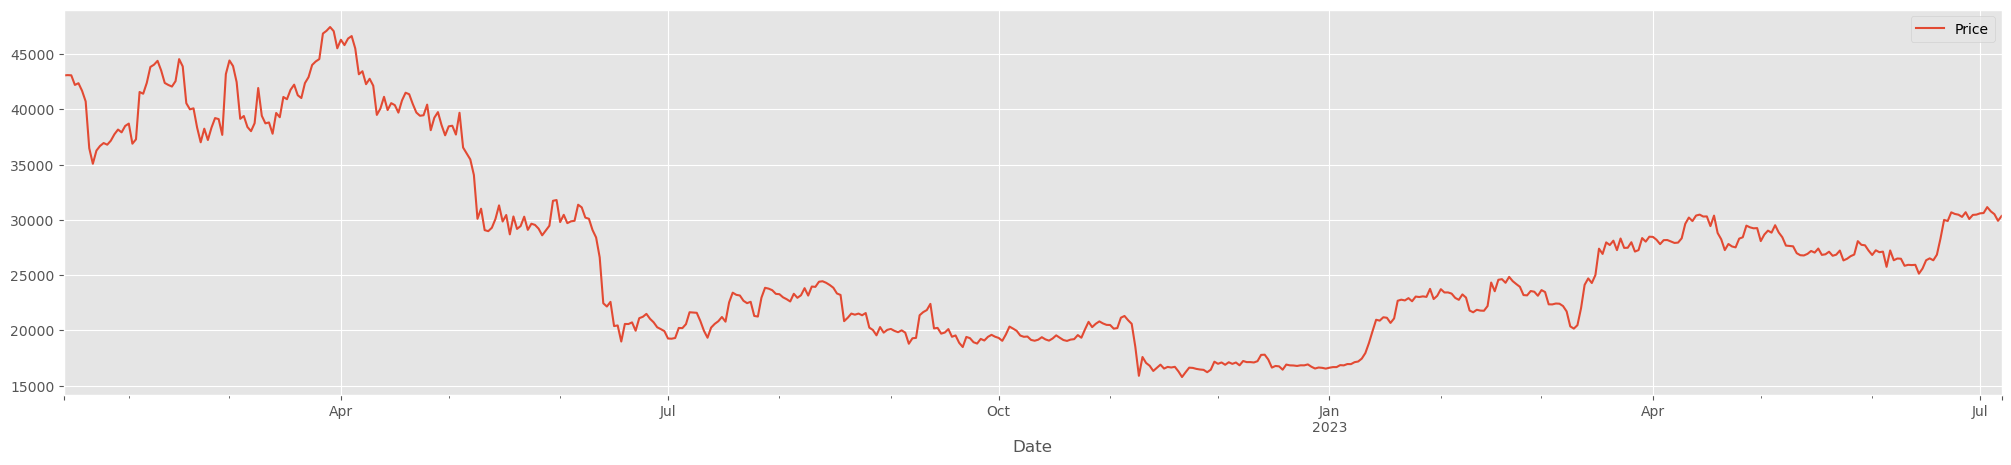

In [104]:
ts.plot(figsize=(25,5));

In [105]:
# ваш код здесь
from statsmodels.tsa import stattools

df_stat = stattools.adfuller(ts)

print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f\ncritical values: %s' %
      (df_stat[0], df_stat[1], df_stat[4]))

if df_stat[0] > df_stat[4]['5%']:
    print('Есть единичные корни - ряд нестационарный')
else:
    print('Единичных корней нет, ряд стационарен')

The Augmented Dickey-Fuller test statistic -1.497732, 
pvalue: 0.53
critical values: {'1%': -3.442772146350605, '5%': -2.8670191055991836, '10%': -2.5696881663873414}
Есть единичные корни - ряд нестационарный


In [106]:
# ваш код здесь
from statsmodels.tsa import stattools

df_stat = stattools.adfuller(ts)

print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f\ncritical values: %s' %
      (df_stat[0], df_stat[1], df_stat[4]))

if df_stat[0] > df_stat[4]['5%']:
    print('Есть единичные корни - ряд нестационарный')
else:
    print('Единичных корней нет, ряд стационарен')

The Augmented Dickey-Fuller test statistic -1.497732, 
pvalue: 0.53
critical values: {'1%': -3.442772146350605, '5%': -2.8670191055991836, '10%': -2.5696881663873414}
Есть единичные корни - ряд нестационарный


In [107]:
# ваш код здесь
from statsmodels.tsa.stattools import kpss

kpss_stat = stattools.kpss(ts[-1000:])
print('The KPSS test statistic %f, \npvalue: %.3f \ntable distribution: %s' %
      (kpss_stat[0], kpss_stat[1], kpss_stat[3]))

if kpss_stat[0] > kpss_stat[3]['5%']:
    print('Отвергаем H0, значит, ряд нестационарный')
else:
    print('Ряд стационарный')

The KPSS test statistic 1.482447, 
pvalue: 0.010 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Отвергаем H0, значит, ряд нестационарный


In [108]:
# ваш код здесь
from copy import deepcopy
from scipy import stats

ts_wage_boxcox = deepcopy(ts)

print('optimal lambda:', stats.boxcox(ts['Price'])[1])

optimal lambda: -0.663048240536409


In [109]:
import warnings
warnings.filterwarnings('ignore')

In [110]:
ts = np.log(ts)
ts

,Price
Date,
2022-01-14,10.670658594570
2022-01-15,10.671208668101
2022-01-16,10.670793239687
2022-01-17,10.650395854891
2022-01-18,10.654068386832
...,...
2023-07-03,10.346611256892
2023-07-04,10.334243468264
2023-07-05,10.325901546689


In [111]:
index = pd.date_range(start="2022-01-14", end="2023-07-07", freq="D")
ts_s = pd.Series(ts['Price'].values, index)
ts_s

2022-01-14   10.670658594570
2022-01-15   10.671208668101
2022-01-16   10.670793239687
2022-01-17   10.650395854891
2022-01-18   10.654068386832
                   ...      
2023-07-03   10.346611256892
2023-07-04   10.334243468264
2023-07-05   10.325901546689
2023-07-06   10.306051790519
2023-07-07   10.320433173307
Freq: D, Length: 540, dtype: float64

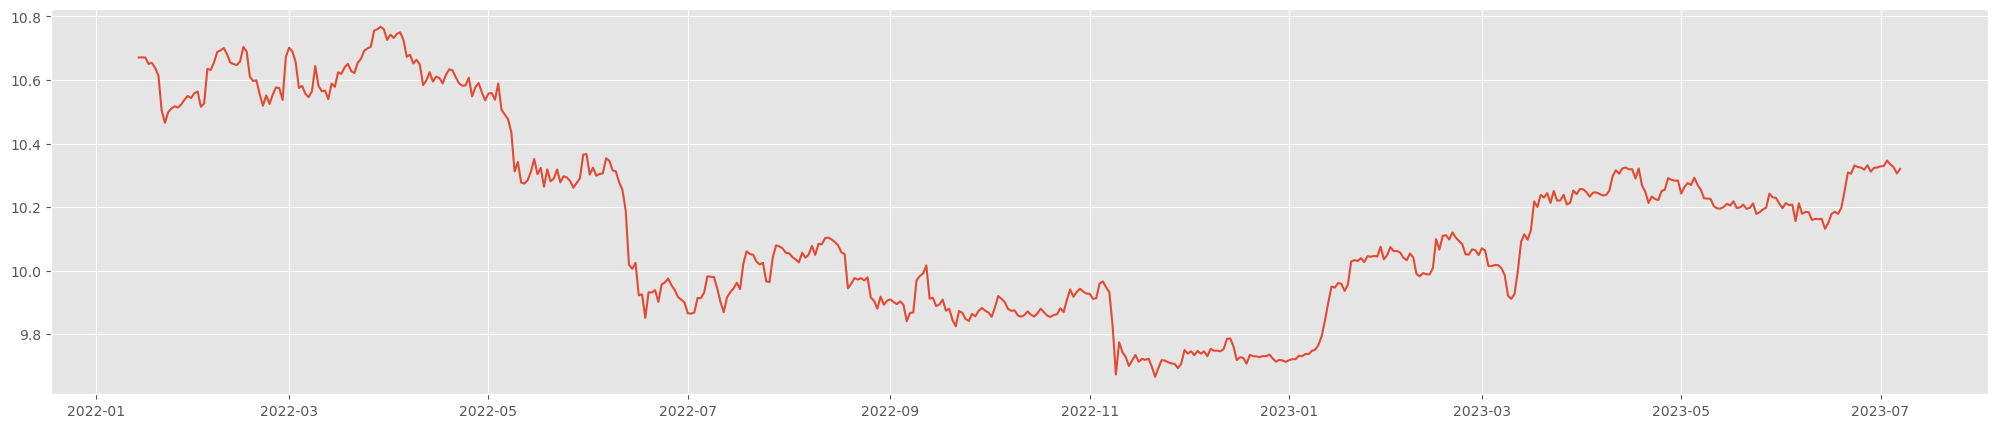

In [112]:
plt.figure(figsize=(25,5))
plt.plot(ts_s)

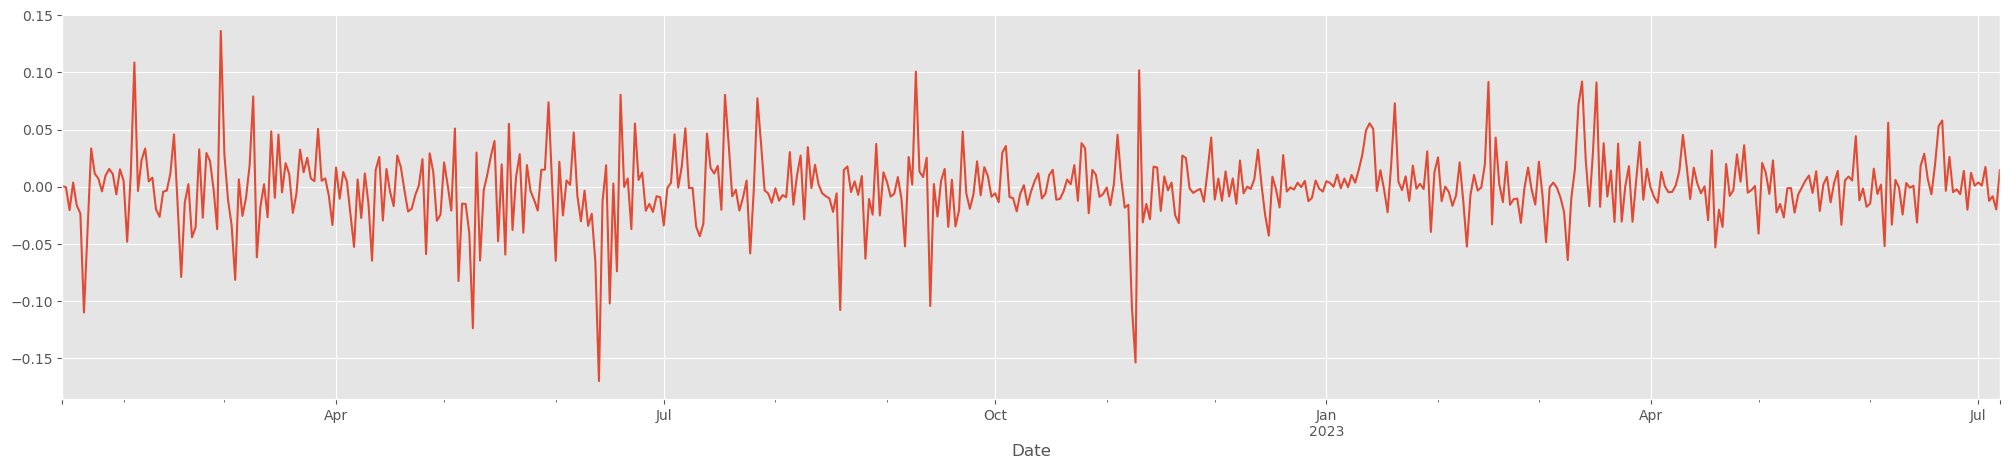

In [113]:
diff_ts_wage = (ts['Price'] - ts['Price'].shift(1))[1:]
diff_ts_wage.plot(figsize=(25,5));

In [114]:
# ваш код здесь
from statsmodels.tsa.stattools import kpss

kpss_stat = stattools.kpss(diff_ts_wage[-1000:])
print('The KPSS test statistic %f, \npvalue: %.3f \ntable distribution: %s' %
      (kpss_stat[0], kpss_stat[1], kpss_stat[3]))

if kpss_stat[0] > kpss_stat[3]['5%']:
    print('Отвергаем H0, значит, ряд нестационарный')
else:
    print('Ряд стационарный')

The KPSS test statistic 0.330204, 
pvalue: 0.100 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Ряд стационарный


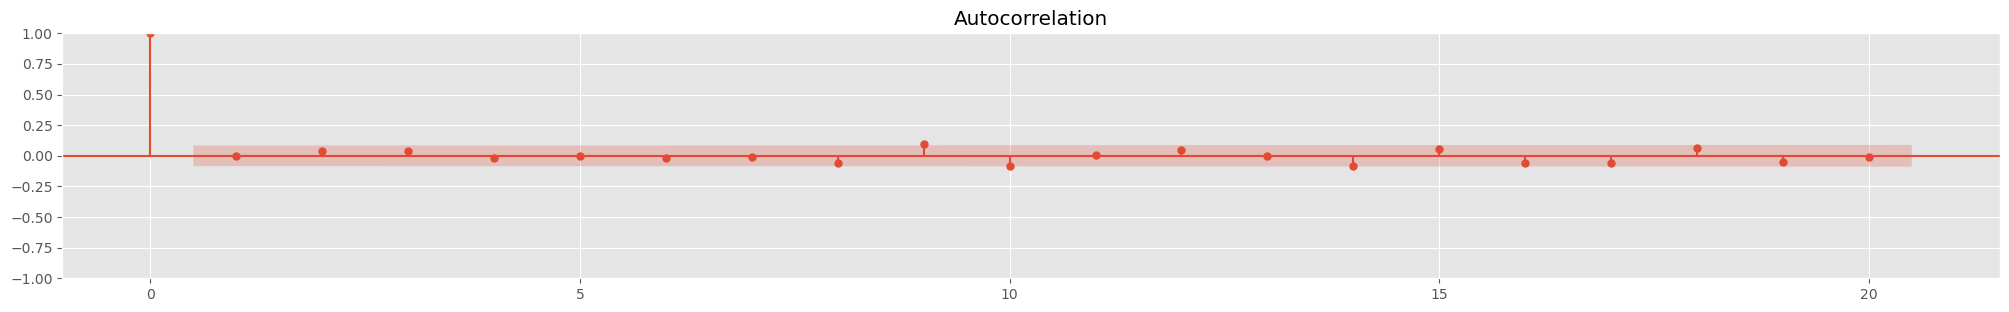

In [115]:
# ваш код здесь
import statsmodels.api as sm

fig = plt.figure(figsize=(25,7))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff_ts_wage, lags=20, ax = ax1);

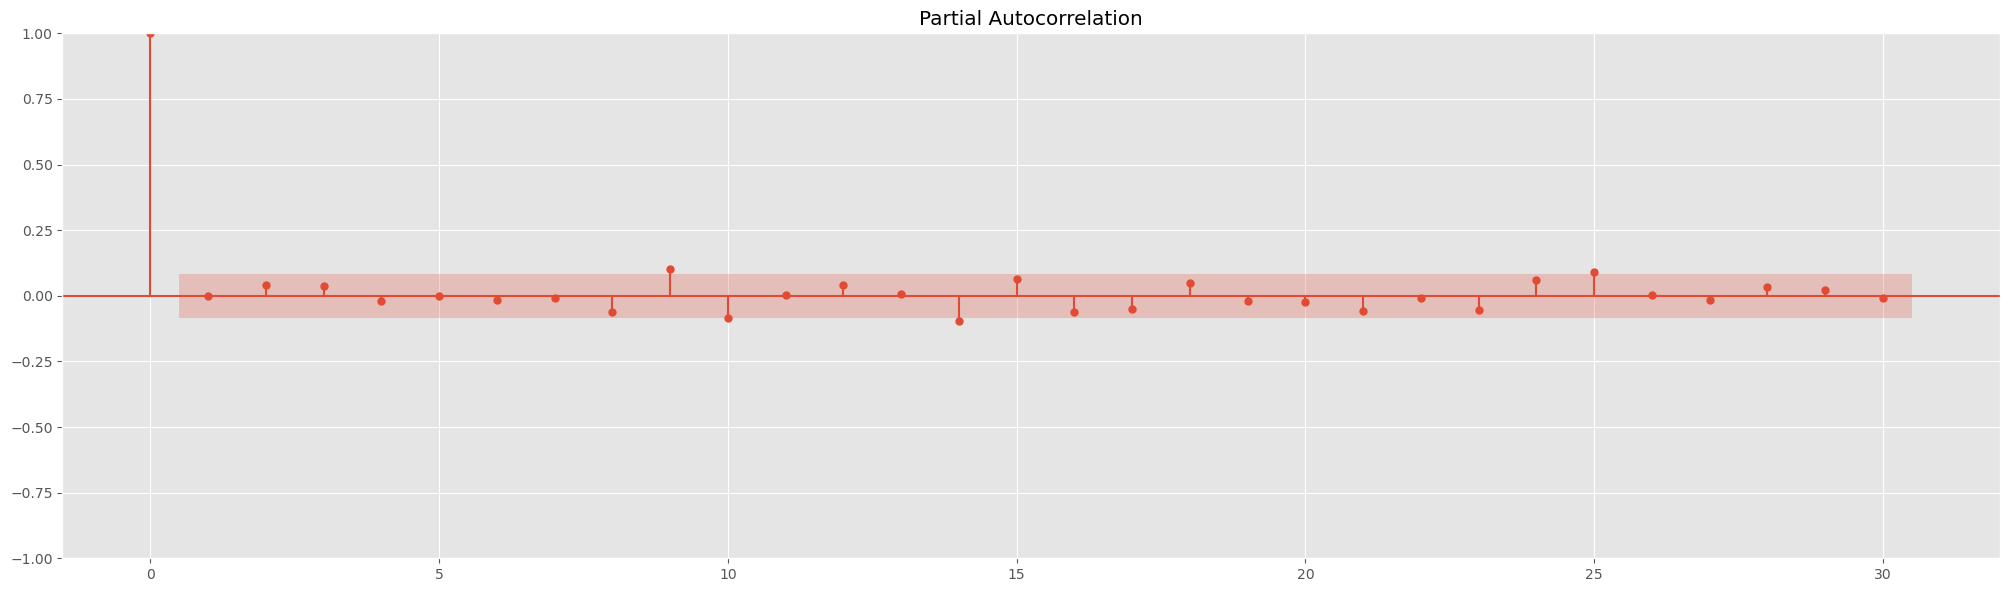

In [116]:
# ваш код здесь
fig = plt.figure(figsize=(25,15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(diff_ts_wage, lags=30, ax = ax1)

## Модели Хольта-Винтерса

In [138]:
# ваш код здесь
train_length = int(len(ts) * 0.85)

train = ts[:train_length]
test = ts[train_length:]

train.shape, test.shape

((459, 1), (81, 1))

In [118]:
train

,Price
Date,
2022-01-14,10.670658594570
2022-01-15,10.671208668101
2022-01-16,10.670793239687
2022-01-17,10.650395854891
2022-01-18,10.654068386832
...,...
2023-04-13,10.321783327792
2023-04-14,10.324579916530
2023-04-15,10.318889790090


In [119]:
test

,Price
Date,
2023-04-18,10.321612189591
2023-04-19,10.268606247462
2023-04-20,10.248512396833
2023-04-21,10.213351771922
2023-04-22,10.233291174720
...,...
2023-07-03,10.346611256892
2023-07-04,10.334243468264
2023-07-05,10.325901546689


In [120]:
index = pd.date_range(start="2022-01-14", end="2023-04-17", freq="D")
train_s = pd.Series(train['Price'].values, index)
train_s

2022-01-14   10.670658594570
2022-01-15   10.671208668101
2022-01-16   10.670793239687
2022-01-17   10.650395854891
2022-01-18   10.654068386832
                   ...      
2023-04-13   10.321783327792
2023-04-14   10.324579916530
2023-04-15   10.318889790090
2023-04-16   10.319242867726
2023-04-17   10.289936324140
Freq: D, Length: 459, dtype: float64

In [121]:
indexx = pd.date_range(start="2023-04-18", end="2023-07-07", freq="D")
test_s = pd.Series(test['Price'].values, indexx)
test_s

2023-04-18   10.321612189591
2023-04-19   10.268606247462
2023-04-20   10.248512396833
2023-04-21   10.213351771922
2023-04-22   10.233291174720
                   ...      
2023-07-03   10.346611256892
2023-07-04   10.334243468264
2023-07-05   10.325901546689
2023-07-06   10.306051790519
2023-07-07   10.320433173307
Freq: D, Length: 81, dtype: float64

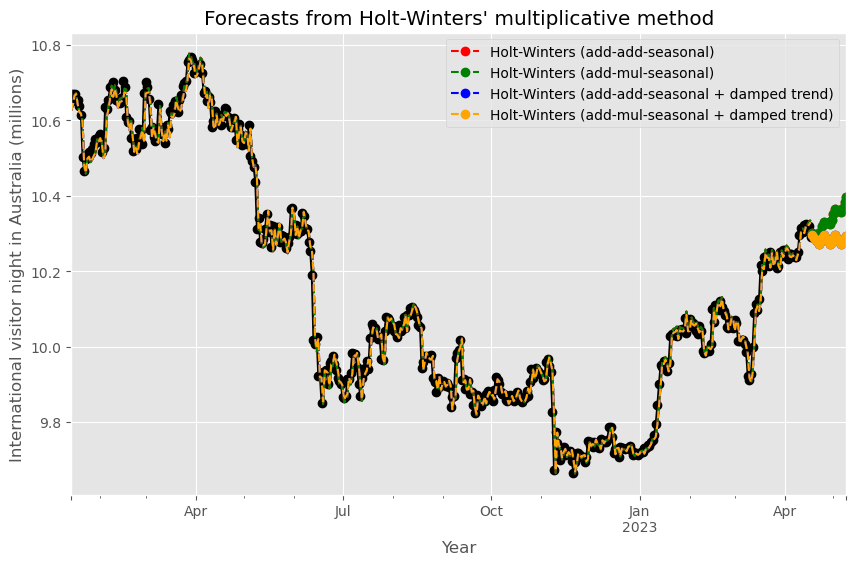

Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.


In [122]:
fit1 = ExponentialSmoothing(
    train_s,
    seasonal_periods=7,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

fit2 = ExponentialSmoothing(
    train_s,
    seasonal_periods=7,
    trend="add",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

fit3 = ExponentialSmoothing(
    train_s,
    seasonal_periods=7,
    trend="add",
    seasonal="add",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()

fit4 = ExponentialSmoothing(
    train_s,
    seasonal_periods=7,
    trend="add",
    seasonal="mul",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()

results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)

ax = train_s.plot(
    figsize=(10, 6),
    marker="o",
    color="black",
    title="Forecasts from Holt-Winters' multiplicative method",
)

ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")

fit1.fittedvalues.plot(ax=ax, style="--", color="red")
fit2.fittedvalues.plot(ax=ax, style="--", color="green")
fit3.fittedvalues.plot(ax=ax, style="--", color="blue")
fit4.fittedvalues.plot(ax=ax, style="--", color="orange")

fit1.forecast(22).rename("Holt-Winters (add-add-seasonal)").plot(
    ax=ax, style="--", marker="o", color="red", legend=True
)
fit2.forecast(22).rename("Holt-Winters (add-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)
fit3.forecast(22).rename("Holt-Winters (add-add-seasonal + damped trend)").plot(
    ax=ax, style="--", marker="o", color="blue", legend=True
)
fit4.forecast(22).rename("Holt-Winters (add-mul-seasonal + damped trend)").plot(
    ax=ax, style="--", marker="o", color="orange", legend=True
)

plt.show()
print(
    "Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality."
)

In [123]:
from sklearn.metrics import mean_squared_error

# ваш код здесь
print('RMSE_1 = %.3f' % mean_squared_error(test_s, fit1.predict(start = test_s.index[0], end = test_s.index[-1])) ** 0.5)
print('RMSE_2 = %.3f' % mean_squared_error(test_s, fit2.predict(start = test_s.index[0], end = test_s.index[-1])) ** 0.5)
print('RMSE_3 = %.3f' % mean_squared_error(test_s, fit3.predict(start = test_s.index[0], end = test_s.index[-1])) ** 0.5)
print('RMSE_4 = %.3f' % mean_squared_error(test_s, fit4.predict(start = test_s.index[0], end = test_s.index[-1])) ** 0.5)

RMSE_1 = 0.274
RMSE_2 = 0.274
RMSE_3 = 0.071
RMSE_4 = 0.071


In [125]:
fit4 = ExponentialSmoothing(
    ts_s,
    seasonal_periods=7,
    trend="add",
    seasonal="mul",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated"
).fit()

pred = fit4.forecast(7)

In [126]:
pred = pred.to_frame()
pred

,0
2023-07-08,10.312781572770
2023-07-09,10.316612904602
2023-07-10,10.326466214672
2023-07-11,10.336054110157
2023-07-12,10.328368810229
2023-07-13,10.323614709634
2023-07-14,10.320089160137


In [127]:
import math
pred[0] = pred[0].apply(lambda x: math.exp(x))
pred

,0
2023-07-08,30115.087553222496
2023-07-09,30230.689760589536
2023-07-10,30530.034466661211
2023-07-11,30824.161020414642
2023-07-12,30588.176067007986
2023-07-13,30443.101922769802
2023-07-14,30335.962234210278


In [128]:
pred[0]

2023-07-08   30115.087553222496
2023-07-09   30230.689760589536
2023-07-10   30530.034466661211
2023-07-11   30824.161020414642
2023-07-12   30588.176067007986
2023-07-13   30443.101922769802
2023-07-14   30335.962234210278
Freq: D, Name: 0, dtype: float64

## SARIMAX

In [129]:
# ваш код здесь
p_values = range(0,5)
q_values = range(0,5)
# d_values

range(0, 5)

In [135]:
train

,Price
Date,
2022-01-14,10.670658594570
2022-01-15,10.671208668101
2022-01-16,10.670793239687
2022-01-17,10.650395854891
2022-01-18,10.654068386832
...,...
2023-04-13,10.321783327792
2023-04-14,10.324579916530
2023-04-15,10.318889790090


In [139]:
best_score, best_cfg = float("inf"), None

for p in p_values:
    for d in [1]:
        for q in q_values:
            order = (p,d,q)
            try:
                model = sm.tsa.statespace.SARIMAX(train, order=order, enforce_invertibility=True, enforce_stationarity=True).fit()
                y_hat = model.predict(start = test.index[0], end = test.index[-1])

                if model.aic < best_score:
                    best_score, best_cfg = model.aic, order
                    print('SARIMAX%s AIC=%.3f' % (order, model.aic))
            except:
                continue
print('Best SARIMAX%s AIC=%.3f' % (best_cfg, best_score))

SARIMAX(0, 1, 0) AIC=7577.736
SARIMAX(2, 1, 2) AIC=7577.693
SARIMAX(2, 1, 3) AIC=7562.722
SARIMAX(3, 1, 2) AIC=7562.682
Best SARIMAX(3, 1, 2) AIC=7562.682


In [140]:
# ваш код здесь
best_score, best_cfg = float("inf"), None
P = 4
Q = 4
D = 1

for P_try in range(P+1):
  for D_try in range(D+1):
    for Q_try in range(Q+1):
        try:
            s_order = (P_try, D_try, Q_try, 7)
            model = sm.tsa.statespace.SARIMAX(train, order=(3,1,2), seasonal_order=s_order).fit()
            y_hat = model.predict(start=len(train), end=(len(train)+len(test)-1))

            if model.aic < best_score:
                best_score, best_cfg = model.aic, s_order
                print('SARIMAX%s AIC=%.3f' % (s_order, model.aic))
        except:
            continue
print('Best SARIMAX%s AIC=%.3f' % (best_cfg, best_score))

SARIMAX(0, 0, 0, 7) AIC=7562.682
SARIMAX(0, 0, 1, 7) AIC=7555.047
SARIMAX(0, 0, 3, 7) AIC=7554.556
SARIMAX(3, 0, 0, 7) AIC=7553.742
Best SARIMAX(3, 0, 0, 7) AIC=7553.742


In [141]:
model = sm.tsa.statespace.SARIMAX(ts, order=(3,1,2), seasonal_order=(3,0,0,7)).fit()

In [142]:
pred = model.forecast(7)

In [143]:
pred = pred.to_frame()
pred

,predicted_mean
2023-07-08,30371.017633536623
2023-07-09,30327.386889490273
2023-07-10,30315.538284208291
2023-07-11,30503.200381506267
2023-07-12,30715.588184159929
2023-07-13,30726.260882419429
2023-07-14,30752.296289949914
